# Balken auf zwei Stützen mit Einzellast

![](Biegelinie2a.png)

Imports

In [1]:
from sympy import *
from sympy import init_printing
init_printing() 

Variablen definieren

In [24]:
E,Iy,x,a,b,F,M =symbols('E I_y x a b F M')

Differentialgleichung Abschnitt 1 ($0 < x < a$) definieren

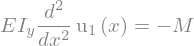

In [3]:
u1=symbols('u1',cls=Function)
dglg1=Eq(E*Iy*u1(x).diff(x,2),-M)
dglg1

Differentialgleichung Abschnitt 2 ($a < x < a+b$) definieren

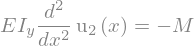

In [4]:
u2=symbols('u2',cls=Function)
dglg2=Eq(E*Iy*u2(x).diff(x,2),-M)
dglg2

Momentenverlauf

![](Biegelinie2b.png)

In [5]:
M1=F*b*x/(a*(a+b))
M2=(F*(a+b-x))/(a+b)

Falls nicht klar ist wie man auf die Gleichung kommt, hier eine mögliche Herleitung:

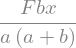

In [6]:
# y(x=0) = 0
x1=0
y1=0 

# y(x=a) = F a
x2=a
y2=F*b/(a+b) 

M1 = (y2-y1)/(x2-x1) * (x-x1) + y1
M1 = M1.simplify()
M1

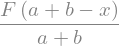

In [7]:
# y(x=a) = F a
x1=a
y1=F*b/(a+b)

# y(x=a+b) = 0
x2=a+b
y2=0

M2 = (y2-y1)/(x2-x1) * (x-x1) + y1
M2 = M2.simplify()
M2

Die komplette Differentialgleichungen für den Abschnitt 1 ($0 < x < a$)  lautetet dann wie folgt:

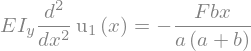

In [8]:
dglg1=Eq(E*Iy*u1(x).diff(x,2),-M1)
dglg1

Die komplette Differentialgleichungen für den Abschnitt 2 ($a < x < a+b$)  lautetet dann wie folgt:

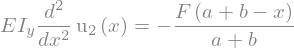

In [9]:
dglg2=Eq(E*Iy*u2(x).diff(x,2),-M2)
dglg2

Differentialgleichung lösen

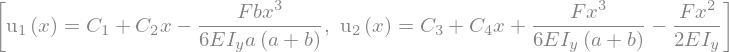

In [10]:
sln=dsolve((dglg1,dglg2))
sln

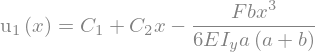

In [11]:
u1 = sln[0]
u1

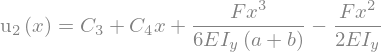

In [12]:
u2 = sln[1]
u2

Integrationskonstanten bestimmen mit Hilfe von Randbedingungen/Übergangsbedingungen bestimmen

Randbedingungen:
- $u_1(x=0) = 0$ -> muss umgestellt werden, so das Gleichung == 0 (ist bereits erfolgt)
- $u_2(x=a+b) = 0$ -> muss umgestellt werden, so das Gleichung == 0 (ist bereits erfolgt)


Übergangsbedingungen:
- $u_1(x=a) = u_2(x=a)$ -> muss umgestellt werden, so das Gleichung == 0 ($u_1(x=a) - u_2(x=a) = 0$)
- $u_1'(x=a) = u_2'(x=a)$ -> muss umgestellt werden, so das Gleichung == 0 ($u_1'(x=a) - u_2'(x=a) = 0$)




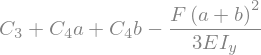

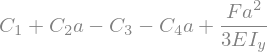

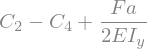

In [13]:
bed1 = simplify(u1.rhs.subs(x,0))
bed2 = simplify(u2.rhs.subs(x,a+b))

bed3 = simplify(u1.rhs.subs(x,a) - u2.rhs.subs(x,a))
bed4 = simplify(u1.rhs.diff(x).subs(x,a) - u2.rhs.diff(x).subs(x,a))

display(bed1)
display(bed2)
display(bed3)
display(bed4)

Gleichungssystem lösen um Integrationskonstanten zu bestimmen

`C = solve([bed1,bed2,bed3,bed4])` führt nicht zur Lösung (Grenzen von Sympy?)

In [15]:
#C = solve([bed1,bed2,bed3,bed4])
#C

Ersetzt man z.B. b=2*a so kommt man auf eine Lösung:

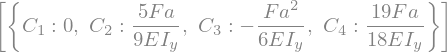

In [16]:
C = solve([bed1.subs(b,2*a),bed2.subs(b,2*a),bed3.subs(b,2*a),bed4.subs(b,2*a)])
C

Integrationskonstanten einsetzen

In [28]:
u1 = u1.subs(C)
u1

KeyError: 0

In [18]:
u2 = u2.subs(C)
u2

KeyError: 0

Gleichung vereinfachen

In [ ]:
u1.simplify()

Daten einsetzen

Will man die das Ergebnis grafisch darstellen, so muss man Werte einsetzen

Beispieldaten: 
- $F=5N$
- $L=10mm$
- $E=210000MPa$
- $I_y=1mm^4$

Das Ergebnis ist dann in den Einheiten in denen die Beispieldaten gegeben sind (also hier in mm)

In [ ]:
data=[(F,5),(L,10),(E,210e3),(Iy,1)]
ux = Lambda(x, u.rhs.subs(data))
ux

plotten

In [ ]:
plot(ux(x),(x,0,L.subs(data)));